# High School Academic Achievement
## English
Multiple Linear Regression, Random Forest, Support Vector Machines, Artificial Neural Network, and XDBoost





## Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("PREPARED_English_DS_V1.xlsx")

In [3]:
df.head()

,PermanentIncomeSupport_3,Scholarship_1,Scholarship_2,Gender_M,AcYear_11,AcYear_12,N_NoApprovals,N_Enrollments,Computer,InternetAccess,UrbanIndex,AgingIndex,UnemploymentIndex,ClassSize,SchoolSize,FinalMark
0,0,0,0,0,1,0,0,1,1,1,138.4,146.2,9.73,23,193,10
1,0,0,1,0,1,0,2,1,0,0,5090.4,189.3,11.76,25,519,10
2,0,0,0,1,0,0,1,1,1,1,424.5,184.1,10.14,30,1040,16
3,0,0,0,0,0,0,0,1,1,1,424.5,184.1,10.14,30,1040,18
4,0,0,0,0,0,0,0,1,1,1,424.5,184.1,10.14,30,1040,10


In [4]:
df.shape

(54885, 16)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
l=len(df.columns)-1
X = df.iloc[:, :l]
X.columns
y = df.iloc[:, -1]
# X = X.to_numpy()
y = y.to_numpy()
y=y.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22)

In [8]:
sc = StandardScaler()

X_std = sc.fit(X_train)
# y_std = sc.fit(y_train.reshape(-1,1))

X_train_std = X_std.transform(X_train)
# y_train_std = y_std.transform(y_train.reshape(-1, 1))

X_test_std = X_std.transform(X_test)
# y_test_std = y_std.transform(y_test.reshape(-1, 1))

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
X_constant = sm.add_constant(X)
X_train_constant = sm.add_constant(X_train)
X_test_constant = sm.add_constant(X_test)

C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
# pd.DataFrame(X_constant)

In [12]:
OLS_rgr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [13]:
OLS_rgr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
OLS_rgr.score(X_train, y_train)

0.12883321563905348

In [15]:
OLS_rgr.coef_

array([[-4.45997417e-01, -8.08511243e-01, -9.25442147e-01,
         1.28157426e-01,  9.43925030e-01,  2.62586213e+00,
        -1.21006720e+00, -6.70989494e-01, -1.83835078e-01,
         3.34978275e-01, -4.99978879e-05,  2.40235981e-03,
         4.58491871e-02,  1.64334840e-02,  4.76314572e-04]])

In [16]:
OLS_rgr.intercept_

array([13.07766539])

In [17]:
scores = cross_val_score(OLS_rgr, X_train, y_train, cv=5, scoring='r2')
scores #R^2

array([0.13384135, 0.11850459, 0.13306138, 0.12865427, 0.12474634])

In [18]:
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: 0.13 (+/- 0.01)


In [19]:
r2_OLS_rgr_cv = scores.mean()
std_OLS_rgr_cv = scores.std() 

In [20]:
y_train_pred=OLS_rgr.predict(X_train)
y_test_pred=OLS_rgr.predict(X_test)

In [21]:
mse_OLS_rgr_train = metrics.mean_squared_error(y_train, y_train_pred) 
mse_OLS_rgr_test = metrics.mean_squared_error(y_test, y_test_pred)

r2_OLS_rgr_train = metrics.r2_score(y_train, y_train_pred)
r2_OLS_rgr_test = metrics.r2_score(y_test, y_test_pred)

In [22]:
columns = ['R2_cv','std_cv','MSE_train','MSE_test', 'R2_train', 'R2_test']

In [23]:
df_results= pd.DataFrame(columns=columns)

In [24]:
new_results_dic = {'R2_cv': r2_OLS_rgr_cv ,'std_cv': std_OLS_rgr_cv,'MSE_train': mse_OLS_rgr_train,
                   'MSE_test': mse_OLS_rgr_test, 'R2_train': r2_OLS_rgr_train, 'R2_test': r2_OLS_rgr_test}
df_results.loc[len(df_results)] = new_results_dic


In [25]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'OLS'}, inplace=True)
df_results.head()


,R2_cv,std_cv,MSE_train,MSE_test,R2_train,R2_test
OLS,0.127762,0.005668,8.198322,8.31364,0.128833,0.132835


In [26]:
print("R2: %0.2f" % (r2_OLS_rgr_test))

R2: 0.13


In [27]:
df_y_train = pd.DataFrame()
df_y_test = pd.DataFrame()

In [28]:
df_y_train.loc[:,'OLS'] = pd.Series(y_train_pred.ravel())
df_y_train.shape

(38419, 1)

In [29]:
df_y_test.loc[:,'OLS'] = pd.Series(y_test_pred.ravel())
df_y_test.shape

(16466, 1)

In [30]:
df_y_train.head()

,OLS
0,16.780056
1,12.679535
2,15.029712
3,15.330722
4,11.662264


In [31]:
df_y_test.head()

,OLS
0,15.275436
1,14.169345
2,15.504234
3,15.085562
4,15.499572


In [32]:
OLS_model = sm.OLS(y_train, X_train_constant)
lr = OLS_model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     378.6
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:11:50   Log-Likelihood:                -94930.
No. Observations:               38419   AIC:                         1.899e+05
Df Residuals:                   38403   BIC:                         1.900e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       13.0777      0.165     79.195      0.000      12.754      13.401
PermanentIncomeSupport_3    -0.4460      0.140     -3.194      0.001      -0.720      -0.172
Scholarship_1               -0.8085      0.043    -18.925      0.000      -0.892      -0.725
Scholarship_2               -0.9254      0.044    -20.969      0.000      -1.012      -0.839
Gender_M                     0.1282      0.029      4.348      0.000       0.070       0.186
AcYear_11                    0.9439      0.038     25.171      0.000       0.870       1.017
AcYear_12                    2.6259      0.062     42.033      0.000       2.503       2.748
N_NoApprovals               -1.2101      0.027    -45.431      0.000      -1.262      -1.158
N_Enrollments               -0.6710      0.059    -11.404      0.000      -0.786      -0.556
Computer                    -0.1838      0.094     -1.961      0.050      -0.368   -7.34e-05
InternetAccess               0.3350      0.091      3.679      0.000       0.157       0.513
UrbanIndex                   -5e-05    9.3e-06     -5.377      0.000   -6.82e-05   -3.18e-05
AgingIndex                   0.0024      0.000      8.053      0.000       0.002       0.003
UnemploymentIndex            0.0458      0.006      7.301      0.000       0.034       0.058
ClassSize                    0.0164      0.003      4.916      0.000       0.010       0.023
SchoolSize                   0.0005   4.48e-05     10.641      0.000       0.000       0.001
==============================================================================
Omnibus:                     1013.197   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.579
Skew:                          -0.166   Prob(JB):                    2.13e-134
Kurtosis:                       2.476   Cond. No.                     2.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
rf_rgr = RandomForestRegressor(bootstrap = True, #Best estimator
 criterion = 'mse',
 max_depth = None,
 max_features = 'auto',
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0,
 min_impurity_split = None,
 min_samples_leaf = 0.001,
 min_samples_split = 0.001,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 200,
 n_jobs = None,
 oob_score = False,
 random_state = 42,
 verbose = 0,
 warm_start = False)

rf_rgr.fit(X_train_std, y_train)

C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.001, min_samples_split=0.001,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [35]:
y_train_pred = rf_rgr.predict(X_train_std)
y_test_pred = rf_rgr.predict(X_test_std)

scores = cross_val_score(rf_rgr, X_train_std, y_train.ravel(), cv=5, scoring='r2')
 
r2_rf_rgr_cv = scores.mean()
std_rf_rgr_cv = scores.std() 

mse_rf_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_rf_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

r2_rf_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_rf_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())


In [36]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))      

MSE train: 7.2905, test: 7.9404
R^2 train: 0.2253, test: 0.1718


In [37]:
new_results_dic = {'R2_cv': r2_rf_rgr_cv ,'std_cv': std_rf_rgr_cv,'MSE_train': mse_rf_rgr_train,
                   'MSE_test': mse_rf_rgr_test, 'R2_train': r2_rf_rgr_train, 'R2_test': r2_rf_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [38]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'RF'}, inplace=True)
df_results.head()

,R2_cv,std_cv,MSE_train,MSE_test,R2_train,R2_test
OLS,0.127762,0.005668,8.198322,8.31364,0.128833,0.132835
RF,0.161435,0.004573,7.290466,7.94045,0.225304,0.171761


In [39]:
df_y_train.loc[:,'RF'] = pd.Series(y_train_pred)
df_y_train.shape

(38419, 2)

In [40]:
df_y_test.loc[:,'RF'] = pd.Series(y_test_pred)
df_y_test.shape

(16466, 2)

In [41]:
df_y_train.head()

,OLS,RF
0,16.780056,15.790575
1,12.679535,12.509075
2,15.029712,15.122949
3,15.330722,15.242884
4,11.662264,12.411303


In [42]:
df_y_test.head()

,OLS,RF
0,15.275436,14.721972
1,14.169345,13.581197
2,15.504234,14.160836
3,15.085562,15.651684
4,15.499572,15.502973


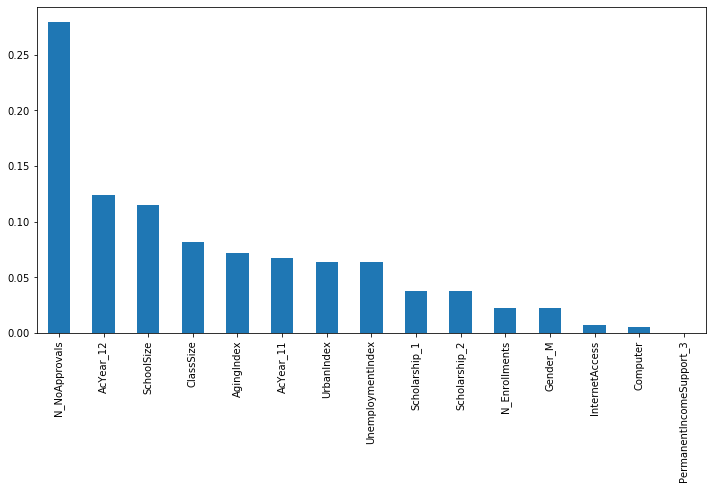

In [43]:
pd.Series(rf_rgr.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

## Support Vector Machine

In [44]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
import math

In [45]:
samples_limit=7500

In [46]:
n_estimators=math.ceil(len(X_train)/samples_limit)
n_estimators

6

In [47]:
max_samples= math.floor(len(X_train)/n_estimators)
max_samples

6403

In [48]:
len(X_train)-(n_estimators*max_samples)

1

In [49]:
sv_rgr = SVR(C=1.6378937069540647, cache_size=400, coef0=0.0, degree=3, epsilon=0.2,
     gamma=0.011787686347935873, kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=True)

In [50]:
sv_rgr.fit(X_train_std,y_train.ravel())

[LibSVM]

SVR(C=1.6378937069540647, cache_size=400, coef0=0.0, degree=3, epsilon=0.2,
    gamma=0.011787686347935873, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=True)

In [51]:
y_train_pred = sv_rgr.predict(X_train_std)
y_test_pred = sv_rgr.predict(X_test_std)

scores = cross_val_score(sv_rgr, X_train_std, y_train.ravel(), cv=5, scoring='r2')
 
r2_sv_rgr_cv = scores.mean()
std_sv_rgr_cv = scores.std() 

mse_sv_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_sv_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

r2_sv_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_sv_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [52]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred))) 

MSE train: 8.0646, test: 8.2280
R^2 train: 0.1430, test: 0.1418


In [53]:
new_results_dic = {'R2_cv': r2_sv_rgr_cv ,'std_cv': std_sv_rgr_cv,'MSE_train': mse_sv_rgr_train,
                   'MSE_test': mse_sv_rgr_test, 'R2_train': r2_sv_rgr_train, 'R2_test': r2_sv_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [54]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'SV'}, inplace=True)
df_results.head()

,R2_cv,std_cv,MSE_train,MSE_test,R2_train,R2_test
OLS,0.127762,0.005668,8.198322,8.313640,0.128833,0.132835
RF,0.161435,0.004573,7.290466,7.940450,0.225304,0.171761
SV,0.134508,0.008144,8.064586,8.228026,0.143044,0.141765


In [55]:
df_y_train.loc[:,'SV'] = pd.Series(y_train_pred)
df_y_train.shape

(38419, 3)

In [56]:
df_y_test.loc[:,'SV'] = pd.Series(y_test_pred)
df_y_test.shape

(16466, 3)

In [57]:
df_y_train.head()

,OLS,RF,SV
0,16.780056,15.790575,15.810559
1,12.679535,12.509075,11.500928
2,15.029712,15.122949,15.251522
3,15.330722,15.242884,15.648563
4,11.662264,12.411303,11.244985


In [58]:
df_y_test.head()

,OLS,RF,SV
0,15.275436,14.721972,15.345241
1,14.169345,13.581197,12.666565
2,15.504234,14.160836,15.902861
3,15.085562,15.651684,15.288001
4,15.499572,15.502973,15.845475


In [59]:
bsv_rgr = BaggingRegressor(base_estimator=sv_rgr, n_estimators=n_estimators, max_samples=max_samples,
                               max_features=1.0, bootstrap=False, bootstrap_features=False,
                               oob_score=False, warm_start=False, n_jobs=-1, random_state=42,
                               verbose=0)

In [60]:
bsv_rgr.fit(X_train_std,y_train.ravel())

BaggingRegressor(base_estimator=SVR(C=1.6378937069540647, cache_size=400,
                                    coef0=0.0, degree=3, epsilon=0.2,
                                    gamma=0.011787686347935873, kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=True),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=6403, n_estimators=6, n_jobs=-1, oob_score=False,
                 random_state=42, verbose=0, warm_start=False)

In [61]:
y_train_pred = bsv_rgr.predict(X_train_std)
y_test_pred = bsv_rgr.predict(X_test_std)

scores = cross_val_score(bsv_rgr, X_train_std, y_train.ravel(), cv=5, scoring='r2')
 
r2_bsv_rgr_cv = scores.mean()
std_bsv_rgr_cv = scores.std() 

mse_bsv_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_bsv_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

r2_bsv_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_bsv_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())



In [62]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 8.1080, test: 8.2354
R^2 train: 0.1384, test: 0.1410


In [63]:
new_results_dic = {'R2_cv': r2_bsv_rgr_cv ,'std_cv': std_bsv_rgr_cv,'MSE_train': mse_bsv_rgr_train,
                   'MSE_test': mse_bsv_rgr_test, 'R2_train': r2_bsv_rgr_train, 'R2_test': r2_bsv_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [64]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'BSV'}, inplace=True)
df_results.head()

,R2_cv,std_cv,MSE_train,MSE_test,R2_train,R2_test
OLS,0.127762,0.005668,8.198322,8.313640,0.128833,0.132835
RF,0.161435,0.004573,7.290466,7.940450,0.225304,0.171761
SV,0.134508,0.008144,8.064586,8.228026,0.143044,0.141765
BSV,0.133034,0.007358,8.107966,8.235377,0.138435,0.140998


In [65]:
df_y_train.loc[:,'BSV'] = pd.Series(y_train_pred)
df_y_train.shape

(38419, 4)

In [66]:
df_y_test.loc[:,'BSV'] = pd.Series(y_test_pred)
df_y_test.shape

(16466, 4)

In [67]:
df_y_train.head()

,OLS,RF,SV,BSV
0,16.780056,15.790575,15.810559,16.209134
1,12.679535,12.509075,11.500928,11.691078
2,15.029712,15.122949,15.251522,15.112296
3,15.330722,15.242884,15.648563,15.659669
4,11.662264,12.411303,11.244985,11.278633


In [68]:
df_y_test.head()

,OLS,RF,SV,BSV
0,15.275436,14.721972,15.345241,15.420818
1,14.169345,13.581197,12.666565,13.252518
2,15.504234,14.160836,15.902861,15.932961
3,15.085562,15.651684,15.288001,15.340415
4,15.499572,15.502973,15.845475,15.817521


# Multilayer Perceptron

In [69]:
from sklearn.neural_network import MLPRegressor
from itertools import product

In [70]:
mlp_rgr=MLPRegressor(activation= 'logistic',
 alpha = 0.1,
 hidden_layer_sizes = (14, 5),
 learning_rate_init = 0.005,
 random_state = 42)

In [71]:
mlp_rgr.fit(X_train_std,y_train.ravel())

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(14, 5), learning_rate='constant',
             learning_rate_init=0.005, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
y_train_pred = mlp_rgr.predict(X_train_std)
y_test_pred = mlp_rgr.predict(X_test_std)

scores = cross_val_score(mlp_rgr, X_train_std, y_train.ravel(), cv=5, scoring='r2')
 
r2_mlp_rgr_cv = scores.mean()
std_mlp_rgr_cv = scores.std() 

mse_mlp_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_mlp_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

r2_mlp_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_mlp_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())

In [73]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred))) 

MSE train: 7.9640, test: 8.1641
R^2 train: 0.1537, test: 0.1484


In [74]:
new_results_dic = {'R2_cv': r2_mlp_rgr_cv ,'std_cv': std_mlp_rgr_cv,'MSE_train': mse_mlp_rgr_train,
                   'MSE_test': mse_mlp_rgr_test, 'R2_train': r2_mlp_rgr_train, 'R2_test': r2_mlp_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [75]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'NN'}, inplace=True)
df_results.head()

,R2_cv,std_cv,MSE_train,MSE_test,R2_train,R2_test
OLS,0.127762,0.005668,8.198322,8.313640,0.128833,0.132835
RF,0.161435,0.004573,7.290466,7.940450,0.225304,0.171761
SV,0.134508,0.008144,8.064586,8.228026,0.143044,0.141765
BSV,0.133034,0.007358,8.107966,8.235377,0.138435,0.140998
NN,0.141327,0.004269,7.964029,8.164109,0.153730,0.148432


In [76]:
df_y_train.loc[:,'NN'] = pd.Series(y_train_pred)
df_y_train.shape

(38419, 5)

In [77]:
df_y_test.loc[:,'NN'] = pd.Series(y_test_pred)
df_y_test.shape

(16466, 5)

In [78]:
df_y_train.head()

,OLS,RF,SV,BSV,NN
0,16.780056,15.790575,15.810559,16.209134,15.827529
1,12.679535,12.509075,11.500928,11.691078,12.816955
2,15.029712,15.122949,15.251522,15.112296,15.147449
3,15.330722,15.242884,15.648563,15.659669,15.337663
4,11.662264,12.411303,11.244985,11.278633,11.962216


In [79]:
df_y_test.head()

,OLS,RF,SV,BSV,NN
0,15.275436,14.721972,15.345241,15.420818,14.835111
1,14.169345,13.581197,12.666565,13.252518,13.366796
2,15.504234,14.160836,15.902861,15.932961,15.113751
3,15.085562,15.651684,15.288001,15.340415,14.980753
4,15.499572,15.502973,15.845475,15.817521,15.460979


In [80]:
df_y_train.loc[:,'Y'] = pd.Series(y_train.ravel())
df_y_train.shape

(38419, 6)

In [81]:
df_y_test.loc[:,'Y'] = pd.Series(y_test.ravel())
df_y_test.shape

(16466, 6)

In [82]:
df_y_train.head()

,OLS,RF,SV,BSV,NN,Y
0,16.780056,15.790575,15.810559,16.209134,15.827529,11
1,12.679535,12.509075,11.500928,11.691078,12.816955,15
2,15.029712,15.122949,15.251522,15.112296,15.147449,16
3,15.330722,15.242884,15.648563,15.659669,15.337663,16
4,11.662264,12.411303,11.244985,11.278633,11.962216,16


In [83]:
df_y_test.head()

,OLS,RF,SV,BSV,NN,Y
0,15.275436,14.721972,15.345241,15.420818,14.835111,16
1,14.169345,13.581197,12.666565,13.252518,13.366796,10
2,15.504234,14.160836,15.902861,15.932961,15.113751,9
3,15.085562,15.651684,15.288001,15.340415,14.980753,19
4,15.499572,15.502973,15.845475,15.817521,15.460979,15


In [84]:
corr= df_y_train.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,OLS,RF,SV,BSV,NN,Y
OLS,1,0.85,0.93,0.96,0.92,0.36
RF,0.85,1,0.89,0.88,0.9,0.48
SV,0.93,0.89,1,0.99,0.97,0.38
BSV,0.96,0.88,0.99,1,0.96,0.38
NN,0.92,0.9,0.97,0.96,1,0.39
Y,0.36,0.48,0.38,0.38,0.39,1


In [85]:
corr= df_y_test.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,OLS,RF,SV,BSV,NN,Y
OLS,1,0.86,0.94,0.96,0.92,0.37
RF,0.86,1,0.89,0.88,0.9,0.42
SV,0.94,0.89,1,0.99,0.97,0.38
BSV,0.96,0.88,0.99,1,0.96,0.38
NN,0.92,0.9,0.97,0.96,1,0.39
Y,0.37,0.42,0.38,0.38,0.39,1


## XGBoost from models outputs

In [86]:
df_y = pd.concat([df_y_train, df_y_test], axis=0)

In [87]:
df_y.head()

,OLS,RF,SV,BSV,NN,Y
0,16.780056,15.790575,15.810559,16.209134,15.827529,11
1,12.679535,12.509075,11.500928,11.691078,12.816955,15
2,15.029712,15.122949,15.251522,15.112296,15.147449,16
3,15.330722,15.242884,15.648563,15.659669,15.337663,16
4,11.662264,12.411303,11.244985,11.278633,11.962216,16


In [88]:
df_y.shape

(54885, 6)

In [89]:
l=df_y.shape[1]-1
XY = df_y.iloc[:, :l]
XY.columns
yy = df_y.iloc[:, -1]
yy = yy.to_numpy()
yy=yy.reshape(-1,1)

In [90]:
len(XY.T)

5

In [91]:
yy_train= yy[0:df_y_train.shape[0]]
yy_test=yy[df_y_train.shape[0]:]

In [92]:
len(yy_train)

38419

In [93]:
len(yy_test)

16466

In [94]:
XY_train=XY.iloc[0:df_y_train.shape[0],:]
XY_test=XY.iloc[df_y_train.shape[0]:,:]

In [95]:
XY_train.shape

(38419, 5)

In [96]:
XY_test.shape

(16466, 5)

In [97]:
XY_std = sc.fit(XY_train)

In [98]:
XY_train_std = XY_std.transform(XY_train)
XY_test_std = XY_std.transform(XY_test)

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca_train = PCA()
pca_train.fit(XY_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [101]:
print(np.round(pca_train.explained_variance_ratio_,2))

[0.94 0.03 0.02 0.01 0.  ]


In [102]:
pca_train = PCA(n_components=4, random_state=42)

In [103]:
pca_XY_train = pca_train.fit_transform(XY_train_std)
PCAXY_train = pd.DataFrame(data = pca_XY_train
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCAXY_train.head()

,PC1,PC2,PC3,PC4
0,-2.947421,-0.398053,-0.802197,-0.264157
1,4.009442,0.218340,-0.149652,-0.709645
2,-1.181149,0.044297,0.017810,-0.105116
3,-1.741588,-0.136163,0.017574,0.039590
4,5.009793,0.645026,0.137287,-0.207729


In [104]:
pca_XY_test = pca_train.fit_transform(XY_test_std)
PCAXY_test = pd.DataFrame(data = pca_XY_test
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCAXY_test.head()

,PC1,PC2,PC3,PC4
0,-1.178571,-0.379217,-0.164789,0.153659
1,1.880656,-0.002021,-0.676230,-0.379366
2,-1.553919,-1.027821,0.061212,0.256179
3,-1.426945,0.350612,-0.140321,0.108852
4,-2.081677,-0.071900,-0.028558,0.059060


In [105]:
import xgboost as xgb

In [106]:
dtrain = xgb.DMatrix(PCAXY_train, label=yy_train)
dtest = xgb.DMatrix(PCAXY_test, label=yy_test)

In [143]:
# Define initial best params and MAE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best rmse
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))
CV with max_depth=2, min_child_weight=0.0


CV with max_depth=2, min_child_weight=0.0


C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 2.6760954 for 54 rounds
CV with max_depth=2, min_child_weight=27.0
	RMSE 2.674586 for 66 rounds
CV with max_depth=2, min_child_weight=55.0
	RMSE 2.6747706 for 55 rounds
CV with max_depth=2, min_child_weight=274.0
	RMSE 2.6749806 for 75 rounds
CV with max_depth=2, min_child_weight=549.0
	RMSE 2.6747975999999998 for 67 rounds
CV with max_depth=2, min_child_weight=823.0
	RMSE 2.6766145999999997 for 86 rounds
CV with max_depth=2, min_child_weight=1098.0
	RMSE 2.6785276 for 92 rounds
CV with max_depth=4, min_child_weight=0.0
	RMSE 2.6730218 for 15 rounds
CV with max_depth=4, min_child_weight=27.0
	RMSE 2.6733664 for 16 rounds
CV with max_depth=4, min_child_weight=55.0
	RMSE 2.6716168000000002 for 20 rounds
CV with max_depth=4, min_child_weight=274.0
	RMSE 2.6715518000000005 for 18 rounds
CV with max_depth=4, min_child_weight=549.0
	RMSE 2.6736052 for 22 rounds
CV with max_depth=4, min_child_weight=823.0
	RMSE 2.6755408000000003 for 53 rounds
CV with max_depth=4, min_child_weight=1098.

In [146]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(4,11)]
    for colsample in [i/10. for i in range(4,11)]
]

In [147]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0


C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 2.6715518000000005 for 18 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 2.674294 for 28 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 2.674294 for 28 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 2.6745512 for 35 rounds
CV with subsample=1.0, colsample=0.6
	RMSE 2.6745512 for 35 rounds
CV with subsample=1.0, colsample=0.5
	RMSE 2.6745512 for 35 rounds
CV with subsample=1.0, colsample=0.4
	RMSE 2.6778250000000003 for 46 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 2.6715285999999994 for 19 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 2.6732576000000003 for 33 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 2.6732576000000003 for 33 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 2.6742098000000003 for 25 rounds
CV with subsample=0.9, colsample=0.6
	RMSE 2.6742098000000003 for 25 rounds
CV with subsample=0.9, colsample=0.5
	RMSE 2.6742098000000003 for 25 rounds
CV with subsample=0.9, colsample=0.4
	RMSE 2.6787792 for 61 rounds
CV with subsample=0.8, colsam

In [148]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [152]:

min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3


C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 2.6715285999999994 for 19 rounds

CV with eta=0.2
	RMSE 2.6719573999999997 for 31 rounds

CV with eta=0.1
	RMSE 2.6697628 for 75 rounds

CV with eta=0.05
	RMSE 2.6694763999999997 for 144 rounds

CV with eta=0.01
	RMSE 2.6693469999999997 for 655 rounds

CV with eta=0.005
	RMSE 2.6712786 for 998 rounds

Best params: 0.01, RMSE: 2.6693469999999997


In [153]:
params['eta'] = .01

In [155]:
min_rmse = float("Inf")
best_params = None
for lamb in [0.1,0.5,1,1.5,2.5,5,10,15]:
    print("CV with lambda={}".format(lamb))
    # We update our parameters
    params['lambda'] = lamb
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = lamb
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with lambda=0.1


C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 2.6692869999999997 for 682 rounds

CV with lambda=0.5
	RMSE 2.6693148 for 655 rounds

CV with lambda=1
	RMSE 2.6693469999999997 for 655 rounds

CV with lambda=1.5
	RMSE 2.6692232000000002 for 682 rounds

CV with lambda=2.5
	RMSE 2.6692612 for 655 rounds

CV with lambda=5
	RMSE 2.6693431999999997 for 682 rounds

CV with lambda=10
	RMSE 2.6691908 for 680 rounds

CV with lambda=15
	RMSE 2.6690884000000006 for 698 rounds

Best params: 15, RMSE: 2.6690884000000006


In [156]:
params['lambda'] = 15

In [157]:
params

{'eta': 0.01,
 'max_depth': 4,
 'min_child_weight': 274,
 'subsample': 0.9,
 'colsample_bytree': 1.0,
 'lambda': 15,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [158]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:14.1002
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:13.9646
[2]	Test-rmse:13.8305
[3]	Test-rmse:13.6977
[4]	Test-rmse:13.5664
[5]	Test-rmse:13.4365
[6]	Test-rmse:13.3079
[7]	Test-rmse:13.1807
[8]	Test-rmse:13.0547
[9]	Test-rmse:12.9302
[10]	Test-rmse:12.8068
[11]	Test-rmse:12.6848
[12]	Test-rmse:12.564
[13]	Test-rmse:12.4445
[14]	Test-rmse:12.3263
[15]	Test-rmse:12.2094
[16]	Test-rmse:12.0937
[17]	Test-rmse:11.9791
[18]	Test-rmse:11.8657
[19]	Test-rmse:11.7536
[20]	Test-rmse:11.6427
[21]	Test-rmse:11.5329
[22]	Test-rmse:11.4242
[23]	Test-rmse:11.3167
[24]	Test-rmse:11.2104
[25]	Test-rmse:11.1054
[26]	Test-rmse:11.0013
[27]	Test-rmse:10.8984
[28]	Test-rmse:10.7966
[29]	Test-rmse:10.6959
[30]	Test-rmse:10.5962
[31]	Test-rmse:10.4977
[32]	Test-rmse:10.4001
[33]	Test-rmse:10.3036
[34]	Test-rmse:10.208
[35]	Test-rmse:10.1135
[36]	Test-rmse:10.0202
[37]	Test-rmse:9.92758
[38]	Test-rmse:9.83633
[39]	Test-rmse:9.74594
[40]	Test-rmse:9.65647
[41]	Test-rm

[346]	Test-rmse:2.86883
[347]	Test-rmse:2.86831
[348]	Test-rmse:2.86783
[349]	Test-rmse:2.8673
[350]	Test-rmse:2.86681
[351]	Test-rmse:2.86637
[352]	Test-rmse:2.8659
[353]	Test-rmse:2.86545
[354]	Test-rmse:2.86501
[355]	Test-rmse:2.86458
[356]	Test-rmse:2.86411
[357]	Test-rmse:2.86373
[358]	Test-rmse:2.86332
[359]	Test-rmse:2.86293
[360]	Test-rmse:2.8625
[361]	Test-rmse:2.86212
[362]	Test-rmse:2.86172
[363]	Test-rmse:2.86136
[364]	Test-rmse:2.86103
[365]	Test-rmse:2.86069
[366]	Test-rmse:2.86036
[367]	Test-rmse:2.86004
[368]	Test-rmse:2.85972
[369]	Test-rmse:2.85937
[370]	Test-rmse:2.85905
[371]	Test-rmse:2.85871
[372]	Test-rmse:2.85841
[373]	Test-rmse:2.8581
[374]	Test-rmse:2.85782
[375]	Test-rmse:2.85753
[376]	Test-rmse:2.85727
[377]	Test-rmse:2.857
[378]	Test-rmse:2.85674
[379]	Test-rmse:2.8565
[380]	Test-rmse:2.85626
[381]	Test-rmse:2.85599
[382]	Test-rmse:2.85577
[383]	Test-rmse:2.85554
[384]	Test-rmse:2.85533
[385]	Test-rmse:2.85513
[386]	Test-rmse:2.85494
[387]	Test-rmse:2.85477

In [159]:
xgb_rgr = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=481,
                           verbosity=1, objective='reg:squarederror',
                           booster='gbtree', n_jobs=-1, gamma=0,
                           min_child_weight=274, max_delta_step=0, subsample=0.9,
                           colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1,
                           reg_alpha=0, reg_lambda=15, scale_pos_weight=1, base_score=0.5,
                           random_state=42, seed=None, missing=None, importance_type='gain')

In [160]:
#dtrain = xgb.DMatrix(PCAXY_train, label=yy_train)
#dtest = xgb.DMatrix(PCAXY_test, label=yy_test)
xgb_rgr.fit(PCAXY_train,yy_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=274, missing=None, n_estimators=481,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=15, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9, verbosity=1)

In [161]:
yy_train_pred = xgb_rgr.predict(PCAXY_train)
yy_test_pred = xgb_rgr.predict(PCAXY_test)

scores = cross_val_score(xgb_rgr, PCAXY_train, yy_train.ravel(), cv=5, scoring='r2')
 
r2_xgb_rgr_cv = scores.mean()
std_xgb_rgr_cv = scores.std() 

mse_xgb_rgr_train = metrics.mean_squared_error(yy_train.ravel(), yy_train_pred.ravel()) 
mse_xgb_rgr_test = metrics.mean_squared_error(yy_test.ravel(), yy_test_pred.ravel())

r2_xgb_rgr_train = metrics.r2_score(yy_train.ravel(), yy_train_pred.ravel())
r2_xgb_rgr_test = metrics.r2_score(yy_test.ravel(), yy_test_pred.ravel())

In [162]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(yy_train, yy_train_pred), 
            mean_squared_error(yy_test, yy_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(yy_train, yy_train_pred),
             r2_score(yy_test, yy_test_pred))) 

MSE train: 7.0373, test: 8.1137
R^2 train: 0.2522, test: 0.1537


In [163]:
new_results_dic = {'R2_cv': r2_xgb_rgr_cv ,'std_cv': std_xgb_rgr_cv,'MSE_train': mse_xgb_rgr_train,
                   'MSE_test': mse_xgb_rgr_test, 'R2_train': r2_xgb_rgr_train, 'R2_test': r2_xgb_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [165]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'XGB'}, inplace=True)
df_results.head(10)

,R2_cv,std_cv,MSE_train,MSE_test,R2_train,R2_test
OLS,0.127762,0.005668,8.198322,8.313640,0.128833,0.132835
RF,0.161435,0.004573,7.290466,7.940450,0.225304,0.171761
SV,0.134508,0.008144,8.064586,8.228026,0.143044,0.141765
BSV,0.133034,0.007358,8.107966,8.235377,0.138435,0.140998
NN,0.141327,0.004269,7.964029,8.164109,0.153730,0.148432
XGB,0.240959,0.004410,7.037337,8.113742,0.252201,0.153685
